In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras import Sequential
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [82]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [83]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [85]:
df.shape

(500, 9)

In [86]:
df.duplicated().sum()

0

In [87]:
df.drop("Serial No.", axis=1, inplace=True)

In [88]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [89]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [90]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [91]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [92]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
421,321,112,3,3.0,4.5,8.95,1
240,296,101,1,2.5,3.0,7.68,0
98,332,119,4,5.0,4.5,9.24,1
294,316,101,2,2.5,2.0,8.32,1
65,325,112,4,3.5,3.5,8.92,0
...,...,...,...,...,...,...,...
59,311,104,2,2.0,2.0,8.30,0
173,323,113,4,4.0,4.5,9.23,1
241,317,103,2,2.5,2.0,8.15,0
419,308,102,2,2.0,3.5,7.98,1


In [93]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
X_train_scaled

array([[0.62      , 0.71428571, 0.5       , ..., 0.875     , 0.68910256,
        1.        ],
       [0.12      , 0.32142857, 0.        , ..., 0.5       , 0.28205128,
        0.        ],
       [0.84      , 0.96428571, 0.75      , ..., 0.875     , 0.78205128,
        1.        ],
       ...,
       [0.54      , 0.39285714, 0.25      , ..., 0.25      , 0.43269231,
        0.        ],
       [0.36      , 0.35714286, 0.25      , ..., 0.625     , 0.37820513,
        1.        ],
       [0.78      , 0.75      , 1.        , ..., 0.875     , 0.84935897,
        1.        ]])

In [95]:
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=7))
model.add(Dense(1, activation="linear"))

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                80        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [97]:
# model.compile(loss= 'mean_squared_error', optimizer= 'Adam')
model.compile(loss="mean_squared_error", optimizer="Adam")

In [98]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 69ms/step - loss: 0.4350 - val_loss: 0.3911
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.3887 - val_loss: 0.3435
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.3363 - val_loss: 0.2878
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2752 - val_loss: 0.2251
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2056 - val_loss: 0.1534
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1290 - val_loss: 0.0865
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0627 - val_loss: 0.0404
Epoch 8/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0259 - val_loss: 0.0286
Epoch 9/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0187 - val_loss: 0.0308
Epoch 10/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0187 - val_loss: 0.0288
Epoch 11/50


In [99]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [100]:
r2_score(y_test, y_pred)

0.5609635340178193

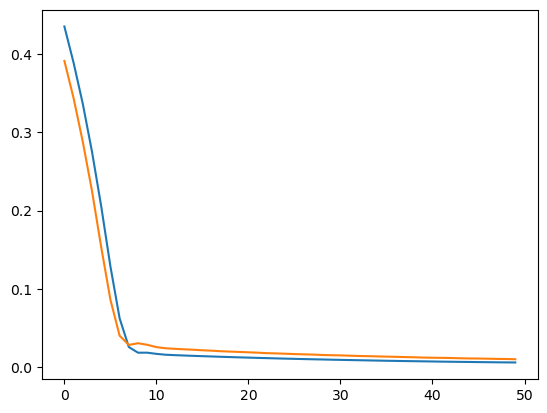

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])